### All needed imports to run notebook

In [1]:
import tensorflow.compat.v2 as tf

import matplotlib.pyplot as plt
import numpy as np

tf.enable_v2_behavior()

### Load MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
num_classes = 10
input_shape = (28,28)

### Visualize the data

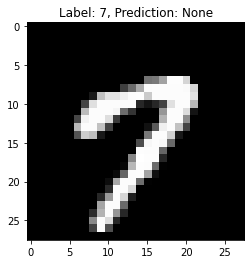

In [3]:
def show_img(x, y, prediction=None):
    plt.imshow(x, cmap='gray')
    plt.title(f"Label: {y}, Prediction: {prediction}")

idx = 15
show_img(x_train[idx], y_train[idx])

### Build training pipeline

In [4]:
# shuffle dataset
shuffler = np.random.permutation(len(x_train))
x_train = x_train[shuffler]
y_train = y_train[shuffler]

# normalize images
x_train = x_train / 255.

### Build evaluation pipeline

In [5]:
# shuffle dataset
shuffler = np.random.permutation(len(x_test))
x_test = x_test[shuffler]
y_test = y_test[shuffler]

# normalize images
x_test = x_test / 255.

### Create and train model (simple sequential)

In [6]:
# note, our objects are `one-hot` which means objects can belong to only one class
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_classes)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
batch_size=128
epochs=6

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
)

Epoch 1/6
422/422 [==============================] - 2s 5ms/step - loss: 0.0783 - sparse_categorical_accuracy: 0.9776 - val_loss: 0.1072 - val_sparse_categorical_accuracy: 0.9680
Epoch 2/6
422/422 [==============================] - 3s 6ms/step - loss: 0.0640 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0923 - val_sparse_categorical_accuracy: 0.9722
Epoch 3/6
422/422 [==============================] - 3s 6ms/step - loss: 0.0540 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0901 - val_sparse_categorical_accuracy: 0.9732
Epoch 4/6
422/422 [==============================] - 3s 6ms/step - loss: 0.0450 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0858 - val_sparse_categorical_accuracy: 0.9727
Epoch 5/6
422/422 [==============================] - 3s 6ms/step - loss: 0.0394 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0820 - val_sparse_categorical_accuracy: 0.9758
Epoch 6/6
422/422 [==============================] - 3s 6ms/step - loss: 0.0324 - sparse_categorical_accu

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.07491428405046463
Test accuracy: 0.9768999814987183


### Make predictions

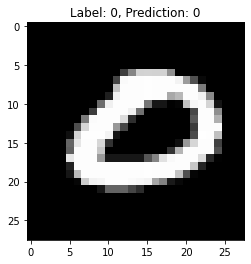

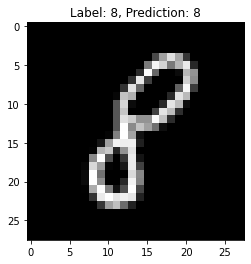

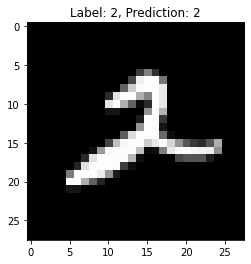

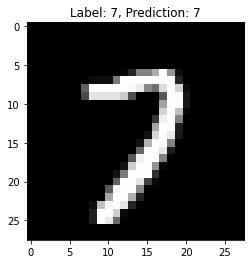

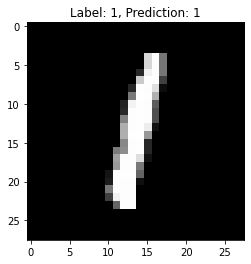

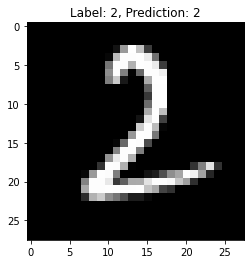

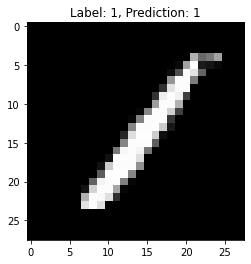

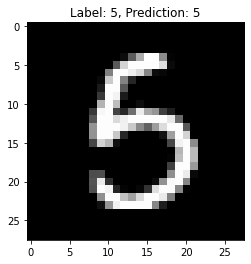

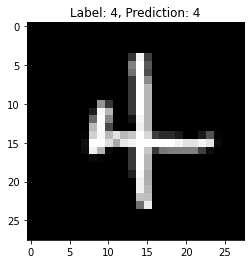

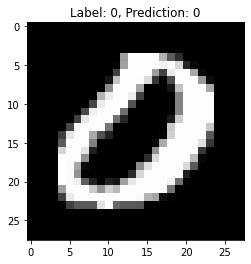

In [11]:
indices = [i for i, x in enumerate(x_test) if i % 1000 == 0]
x = x_test[indices]
y = y_test[indices]

predictions = model.predict(x)
predictions = np.argmax(predictions, axis=1)

for i, pred in enumerate(predictions):
    plt.figure()
    show_img(x[i],y[i],pred)
